In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# grafy

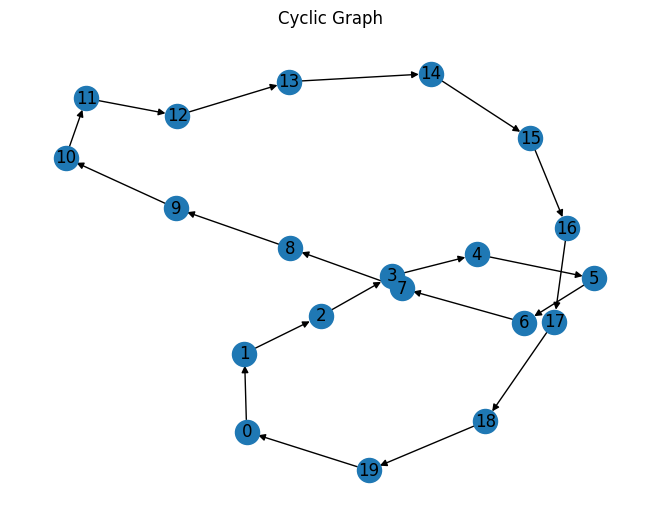

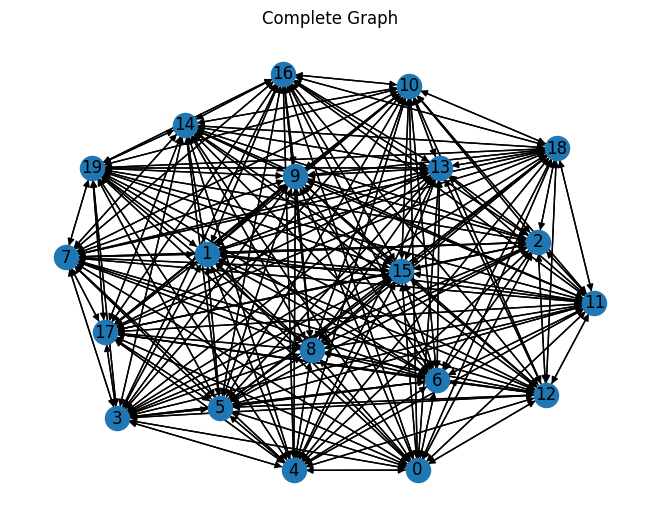

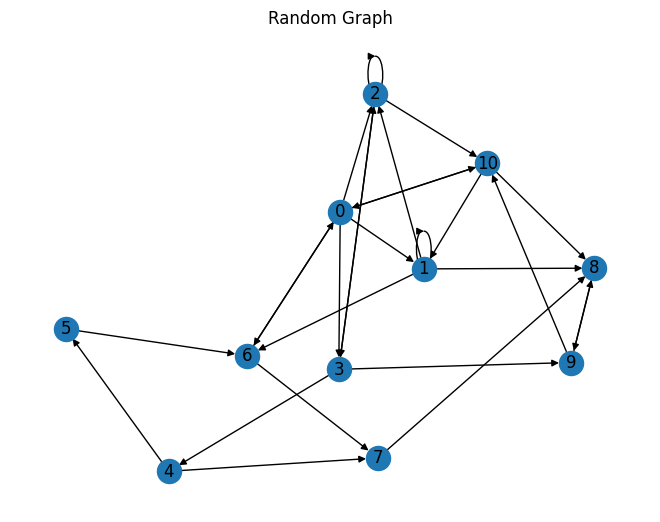

In [3]:
cyclic_graph = nx.cycle_graph(20, create_using=nx.DiGraph())
cyclic_matrix = nx.to_numpy_array(cyclic_graph)

complete_graph = nx.complete_graph(20, create_using=nx.DiGraph())
complete_matrix = nx.to_numpy_array(complete_graph)

random_graph = nx.DiGraph()
random_graph.add_nodes_from(range(11))
random_edges = [(np.random.randint(11), np.random.randint(11)) for _ in range(20)]
random_graph.add_edges_from(random_edges)
for i in range(11):
    random_graph.add_edge(i, (i+1) % 11)
random_matrix = nx.to_numpy_array(random_graph)

# plot the graphs
plt.figure()
nx.draw(cyclic_graph, with_labels=True)
plt.title('Cyclic Graph')
plt.show()

plt.figure()
nx.draw(complete_graph, with_labels=True)
plt.title('Complete Graph')
plt.show()

plt.figure()
nx.draw(random_graph, with_labels=True)
plt.title('Random Graph')
plt.show()



# zadanie 1 - prosty ranking

In [4]:
def simple_ranking(d, A, eps=1e-6, max_iter=100):
  n = A.shape[0]
  r = np.ones(n) / n
  r /= np.linalg.norm(r, 1)

  for _ in range(max_iter):
    r_new = d * np.dot(A, r)
    r_new /= np.linalg.norm(r_new, 1)
    if np.linalg.norm(r_new - r, 1) < eps:
      break
    r = r_new

  return r

In [5]:
print('Cyclic Graph')
print(simple_ranking(0.85, cyclic_matrix))

print('Complete Graph')
print(simple_ranking(0.85, complete_matrix))

print('Random Graph')
print(simple_ranking(0.85, random_matrix))

Cyclic Graph
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
Complete Graph
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
Random Graph
[0.23125106 0.15234941 0.14074483 0.08333281 0.0160045  0.03357948
 0.08986639 0.00925255 0.02476186 0.06626867 0.15258844]


# zadanie 2 - page rank

In [6]:
def page_rank(d, b, A, eps=1e-6, max_iter=100):
  n = A.shape[0]
  r = np.ones(n) / n
  r /= np.linalg.norm(r, 1)

  for _ in range(max_iter):
    r_new = (1 - d) * b * np.ones(n) / n + d * np.dot(A, r)
    r_new /= np.linalg.norm(r_new, 1)
    if np.linalg.norm(r_new - r, 1) < eps:
      break
    r = r_new

  return r

In [7]:
print('Cyclic Graph')
print(page_rank(0.85, 0.7, cyclic_matrix))

print('Complete Graph')
print(page_rank(0.85, 0.7, complete_matrix))

print('Random Graph')
print(page_rank(0.85, 0.7, random_matrix))

Cyclic Graph
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
Complete Graph
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
Random Graph
[0.2229287  0.14919243 0.13723952 0.08550163 0.02210946 0.03610897
 0.08924761 0.01418291 0.02823581 0.06733926 0.1479137 ]


{0: 0.223, 1: 0.149, 2: 0.137, 3: 0.086, 4: 0.022, 5: 0.036, 6: 0.089, 7: 0.014, 8: 0.028, 9: 0.067, 10: 0.148}


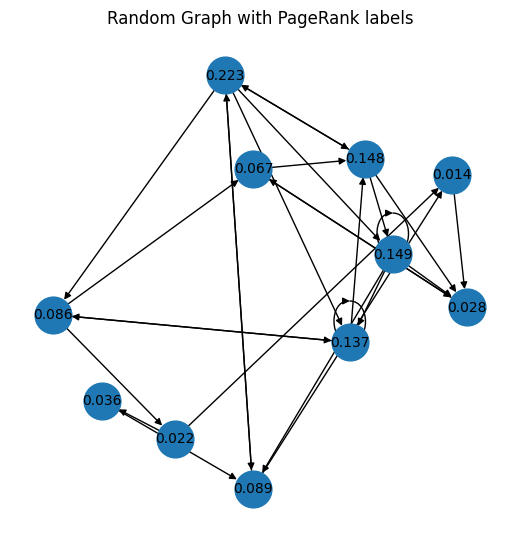

In [8]:
labels = page_rank(0.85, 0.7, random_matrix)
labels = {i: round(labels[i],3) for i in range(len(random_graph))}
print(labels)

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(complete_graph)  # Ustawienie pozycji wierzchołków na okręgu
nx.draw(random_graph, pos, labels = labels, node_size=700, font_size=10, arrows=True)
plt.title("Random Graph with PageRank labels")
plt.show()

# PageRank dla dużego grafu

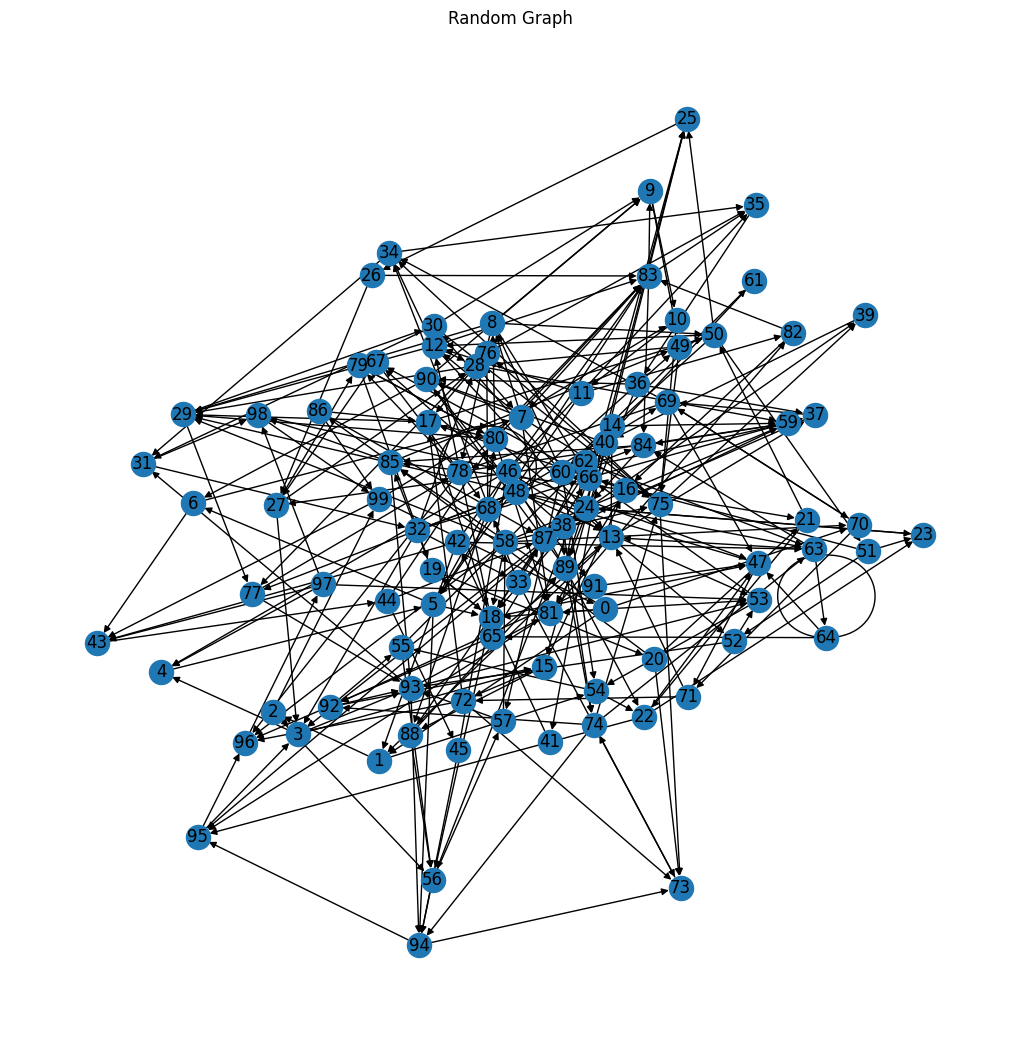

{0: 0.018, 1: 0.005, 2: 0.009, 3: 0.009, 4: 0.005, 5: 0.014, 6: 0.008, 7: 0.019, 8: 0.018, 9: 0.007, 10: 0.008, 11: 0.014, 12: 0.015, 13: 0.008, 14: 0.007, 15: 0.012, 16: 0.016, 17: 0.019, 18: 0.015, 19: 0.013, 20: 0.009, 21: 0.007, 22: 0.006, 23: 0.004, 24: 0.009, 25: 0.003, 26: 0.009, 27: 0.011, 28: 0.012, 29: 0.006, 30: 0.009, 31: 0.009, 32: 0.016, 33: 0.006, 34: 0.005, 35: 0.004, 36: 0.012, 37: 0.01, 38: 0.019, 39: 0.006, 40: 0.016, 41: 0.004, 42: 0.011, 43: 0.005, 44: 0.012, 45: 0.006, 46: 0.014, 47: 0.007, 48: 0.014, 49: 0.012, 50: 0.015, 51: 0.007, 52: 0.005, 53: 0.006, 54: 0.004, 55: 0.005, 56: 0.006, 57: 0.012, 58: 0.026, 59: 0.009, 60: 0.016, 61: 0.003, 62: 0.007, 63: 0.009, 64: 0.008, 65: 0.008, 66: 0.011, 67: 0.013, 68: 0.026, 69: 0.011, 70: 0.006, 71: 0.006, 72: 0.009, 73: 0.004, 74: 0.011, 75: 0.009, 76: 0.011, 77: 0.008, 78: 0.013, 79: 0.012, 80: 0.021, 81: 0.006, 82: 0.011, 83: 0.014, 84: 0.009, 85: 0.015, 86: 0.013, 87: 0.008, 88: 0.008, 89: 0.016, 90: 0.008, 91: 0.006

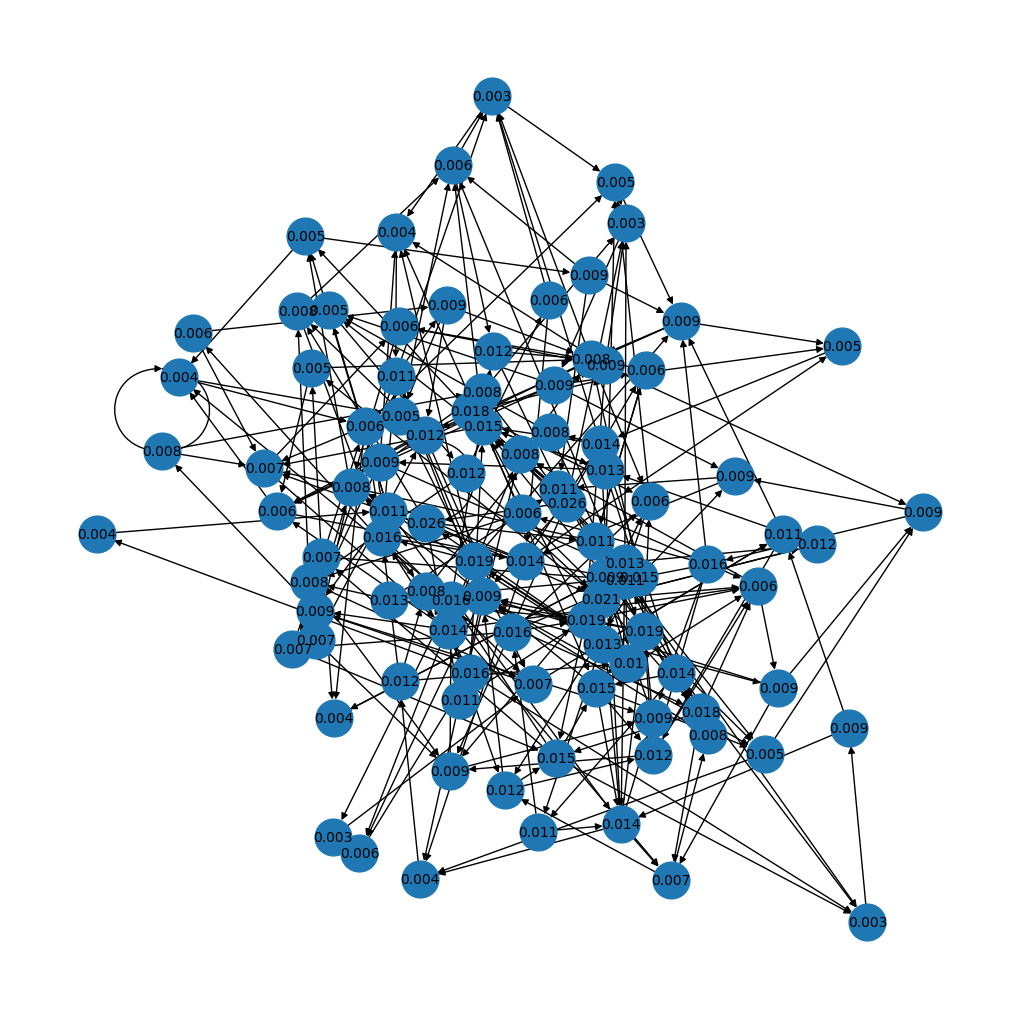

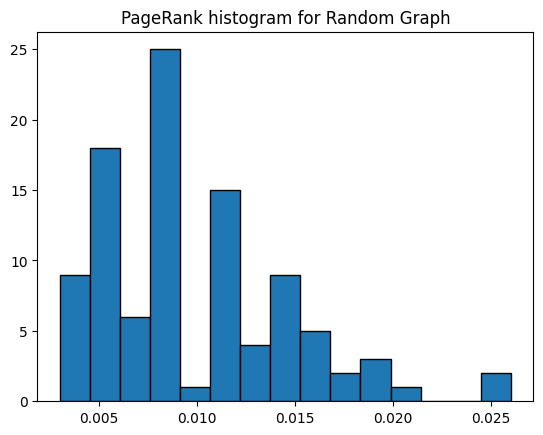

In [9]:
random_graph_big = nx.DiGraph()
random_graph_big.add_nodes_from(range(100))
random_edges_big = [(np.random.randint(100), np.random.randint(100)) for _ in range(200)]
random_graph_big.add_edges_from(random_edges_big)
for i in range(100):
    random_graph_big.add_edge(i, (i+1) % 100)

random_matrix_big = nx.to_numpy_array(random_graph_big)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(random_graph_big)
nx.draw(random_graph_big, pos, with_labels=True)
plt.title('Random Graph')
plt.show()

labels = page_rank(0.85, 0.7, random_matrix_big)
labels = {i: round(labels[i],3) for i in range(len(random_graph_big))}

print(labels)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(random_graph_big)
nx.draw(random_graph_big, pos, labels = labels, node_size=700, font_size=10, arrows=True)
plt.show()


plt.hist(list(labels.values()), bins=15, edgecolor='black')
plt.title('PageRank histogram for Random Graph')
plt.show()